<a href="https://colab.research.google.com/github/hayasakayangg/Count-Rice/blob/main/CountRice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#ic = cv2.imread('/content/1_wIXlvBeAFtNVgJd49VObgQ_sinus.png', 0)
ic = cv2.imread('/content/drive/MyDrive/hatgao3.png', 0)
ic = cv2.resize(ic,(500,500))

In [35]:
img= np.zeros((500,500))
#y=a*sin(2*pi*f*t)
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    img[y,x] = 255*(np.sin(np.pi * 8 * (1/img.shape[1]) * (x+10)))

In [36]:
img=np.abs(img).astype(np.uint8)

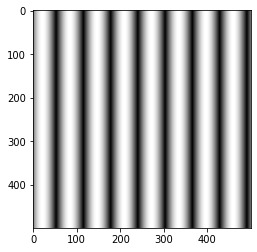

In [37]:
plt.imshow(img,'gray')

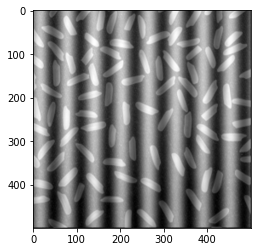

In [38]:
plt.imshow(ic, 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


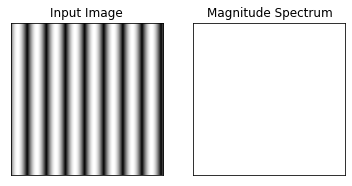

In [39]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
m = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(m, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

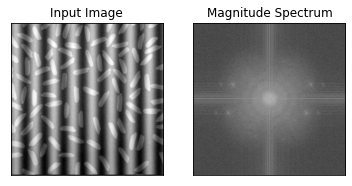

In [40]:
f2 = np.fft.fft2(ic)
fshift2 = np.fft.fftshift(f2)
m2 = 20*np.log(np.abs(fshift2))
plt.subplot(121),plt.imshow(ic, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(m2, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

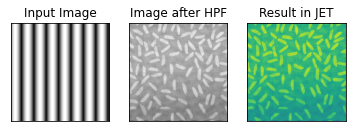

In [41]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift2[fshift!=0] = 0
f_ishift2 = np.fft.ifftshift(fshift2)
img_back = np.fft.ifft2(f_ishift2)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
res=np.zeros(img_back.shape)

In [43]:
res=cv2.normalize(img_back,res,alpha=0,beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

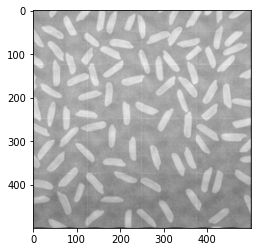

In [100]:
plt.imshow(res, 'gray')

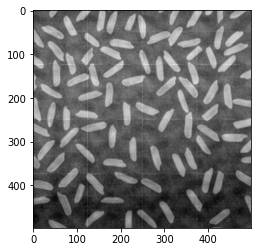

In [98]:
res2 = np.zeros((498, 498), dtype=int)
for i in range(498):
  for j in range(498):
    res2[i][j] = res[i][j]
res2 = np.uint8(res2)
plt.imshow(res2, 'gray')

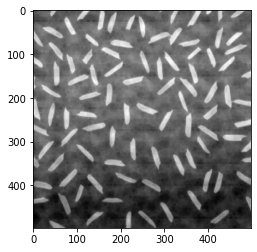

In [120]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(res2,kernel,iterations = 1)
plt.imshow(erosion, 'gray')

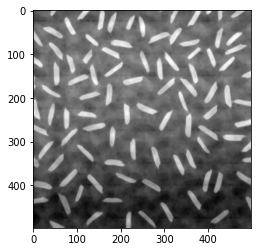

In [121]:
blur = cv2.medianBlur(erosion, 5)
#blur = cv2.GaussianBlur(res, (5, 5), 0)
plt.imshow(blur, 'gray')

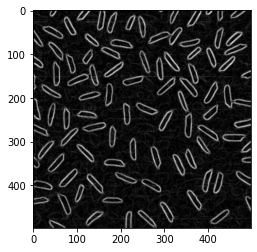

In [122]:
kernel = np.ones((3, 3),np.uint8)
opening = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
plt.imshow(opening, cmap='gray')

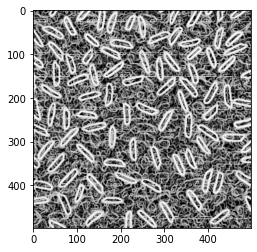

In [123]:
equ = cv2.equalizeHist(opening)
plt.imshow(equ, cmap = 'gray')

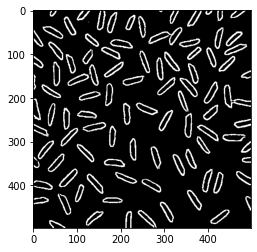

In [130]:
 _, thresh = cv2.threshold(equ, 220, 255, 0)
#thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 61, -10)
plt.imshow(thresh, cmap = 'gray')

98


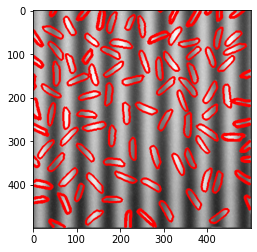

In [131]:
cnt, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(ic, cv2.COLOR_BGR2RGB)
ct =[]
for contour in cnt:
    if cv2.contourArea(contour) > 20:
      ct.append(cv2.contourArea(contour))
      cv2.drawContours(rgb, contour, -1, (255, 0, 0), 3)
plt.show()
plt.imshow(rgb, cmap='gray')
print(len(ct))